In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simple Lineare Regression

Die simple lineare Regression ist eine Methode im Machine Learning, die verwendet wird, um die Beziehung zwischen zwei Variablen zu modellieren. Diese Methode hilft uns zu verstehen, wie sich eine abhängige Variable y ändert, wenn sich die unabhängige Variable X ändert.

Formel

Die grundlegende Formel der linearen Regression lautet:

y = b_0 + b_1 * X 

y : Die abhängige Variable, die wir vorhersagen wollen.

X : Die unabhängige Variable, die zur Vorhersage verwendet wird.

b_0 : Der Achsenabschnitt (intercept), der den Schnittpunkt der Regressionslinie mit der y-Achse darstellt.

b_1 : Die Steigung (slope) der Regressionslinie, die angibt, wie stark y sich ändert, wenn X um eine Einheit steigt.

## Definition der Variablen

In Python definieren wir die unabhängige und die abhängige Variable wie folgt:

In [23]:
dataset = pd.read_csv('Data/drugs_nursing_home.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
-	Unabhängige Variable (X): Dies ist die Variable, die wir verwenden, um die abhängige Variable vorherzusagen. In unserem Fall sind das die “Personalkosten (€)”.      
-	Abhängige Variable (y): Dies ist die Variable, die wir vorhersagen wollen. In unserem Fall sind das die “Prescribed Psychotropic Drugs”.

Warum müssen wir die Variablen definieren?

- Unabhängige Variable (X): Diese Variable ist der Input oder Prädiktor. Sie wird verwendet, um den Einfluss auf die abhängige Variable zu messen.
- Abhängige Variable (y): Diese Variable ist der Output oder das Ergebnis. Sie ist das, was wir vorhersagen oder erklären möchten.

Der Unterschied zwischen den beiden ist, dass die unabhängige Variable diejenige ist, die wir kontrollieren oder verändern, um ihre Auswirkungen auf die abhängige Variable zu beobachten. Die abhängige Variable ist das, was wir als Ergebnis dieser Veränderungen messen.

Indem wir diese Variablen definieren, können wir die Beziehung zwischen ihnen analysieren und vorhersagen, wie Änderungen in X y beeinflussen.

In [ ]:
# Die Variablen anzeigen
print(y)

# Aufteilung des Datensatzes in Trainings- und Testdaten

Bevor wir ein Machine Learning-Modell trainieren, teilen wir den Datensatz in zwei Teile auf: Trainingsdaten und Testdaten. Das wird im folgenden Python-Code durchgeführt:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Warum ist das wichtig?

1.	Modelltraining und -bewertung:
•	Trainingsdaten: Diese Daten werden verwendet, um das Modell zu trainieren. Das Modell lernt aus diesen Daten, um die Beziehungen zwischen der unabhängigen Variablen (X) und der abhängigen Variablen (y) zu verstehen.
	•	Testdaten: Diese Daten werden verwendet, um das trainierte Modell zu evaluieren. Sie helfen uns zu überprüfen, wie gut das Modell auf neuen, unsichtbaren Daten performt.
2.	Überprüfung der Generalisierungsfähigkeit:
	•	Wenn wir das Modell nur auf den Trainingsdaten evaluieren würden, könnten wir nicht sicher sein, ob es auch auf neuen Daten gut funktioniert. Das Modell könnte die Trainingsdaten einfach “auswendig lernen”, anstatt die zugrunde liegenden Muster zu verstehen, was als Overfitting bezeichnet wird.
	•	Durch die Aufteilung in Trainings- und Testdaten können wir überprüfen, ob das Modell die Fähigkeit hat, auf neue Daten zu generalisieren und nicht nur die Trainingsdaten nachzubilden.
3.	Ermittlung der Modellgenauigkeit:
	•	Die Genauigkeit und Leistungsfähigkeit des Modells werden anhand der Testdaten gemessen. Ein gutes Modell sollte sowohl auf den Trainings- als auch auf den Testdaten gut performen.
	•	Die Aufteilung stellt sicher, dass die Testdaten während des Trainings nicht verwendet werden, was eine unvoreingenommene Bewertung der Modellleistung ermöglicht.

Durch die Verwendung von train_test_split mit einer test_size von 0.2 teilen wir den Datensatz so auf, dass 80% der Daten zum Training und 20% der Daten zum Testen verwendet werden. Die random_state sorgt dafür, dass die Aufteilung reproduzierbar ist, sodass bei jedem Ausführen des Codes dieselbe Aufteilung erfolgt.

# Training des Modells

Der nächste Schritt im Machine Learning-Prozess ist das Training des Modells. Hier wird der Code verwendet, um eine einfache lineare Regression durchzuführen:

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Erklärung des Vorgangs

	1.	Importieren des Modells:
	•	from sklearn.linear_model import LinearRegression: Dies importiert das lineare Regressionsmodell aus der scikit-learn-Bibliothek. Die scikit-learn-Bibliothek ist eine weit verbreitete Python-Bibliothek für Machine Learning.
	2.	Erstellen eines Regressor-Objekts:
	•	regressor = LinearRegression(): Hier erstellen wir ein Objekt der Klasse LinearRegression. Dieses Objekt wird verwendet, um das Modell zu trainieren und Vorhersagen zu treffen.
	3.	Training des Modells:
	•	regressor.fit(X_train, y_train): Der fit-Befehl trainiert das Modell. Hier ist, was passiert:
	•	Datenverarbeitung: Der Algorithmus nimmt die Trainingsdaten (X_train und y_train) und berechnet die besten Werte für die Parameter  b_0  (Achsenabschnitt) und  b_1  (Steigung), um die Linie zu finden, die die Daten am besten beschreibt.
	•	Optimierung: Der Algorithmus verwendet eine Methode namens “least squares” (kleinste Quadrate), um die Summe der Quadrate der Abstände zwischen den tatsächlichen und vorhergesagten Werten zu minimieren. Dies stellt sicher, dass die Linie so nah wie möglich an den tatsächlichen Datenpunkten liegt.

Warum ist das wichtig?

	•	Anpassung des Modells an die Daten: Der fit-Befehl passt das Modell an die gegebenen Trainingsdaten an, sodass es lernen kann, wie die unabhängige Variable (X) die abhängige Variable (y) beeinflusst.
	•	Erstellung einer Vorhersagefunktion: Nachdem das Modell trainiert wurde, kann es verwendet werden, um Vorhersagen zu machen. Das bedeutet, dass es für neue, unsichtbare Daten Vorhersagen über die abhängige Variable treffen kann, basierend auf den unabhängigen Variablen.

Das Training des Modells ist ein zentraler Schritt im Machine Learning-Prozess, da hier das Modell lernt, Muster und Beziehungen in den Daten zu erkennen. Sobald das Modell trainiert ist, können wir es verwenden, um Vorhersagen zu machen und die Leistung auf Testdaten zu evaluieren.

# Vorhersage mit dem trainierten Modell

Nachdem wir das Modell trainiert haben, können wir es verwenden, um Vorhersagen für neue, unsichtbare Daten zu machen. Dies wird im folgenden Code durchgeführt:

In [27]:
y_pred = regressor.predict(X_test)

## Erklärung des Vorgangs

	1.	Verwendung des trainierten Modells:
	•	Das trainierte regressor-Objekt enthält nun die besten Schätzwerte für die Parameter  b_0  (Achsenabschnitt) und  b_1  (Steigung) der Regressionslinie, die während des Trainingsprozesses gelernt wurden.
	2.	Vorhersagen treffen:
	•	y_pred = regressor.predict(X_test): Der predict-Befehl verwendet das trainierte Modell, um Vorhersagen zu machen. Hier ist, was passiert:
	•	Eingabedaten (X_test): Das Modell nimmt die Testdaten für die unabhängige Variable (X_test), die es während des Trainingsprozesses noch nie gesehen hat.
	•	Berechnung der Vorhersagen: Das Modell verwendet die zuvor gelernten Parameter  b_0  und  b_1 , um die Vorhersagen für die abhängige Variable (y) zu berechnen. Dies geschieht durch Einsetzen der Testdaten in die lineare Gleichung  y = b_0 + b_1 \cdot X .
	•	Ausgabe (y_pred): Das Ergebnis ist ein Array von vorhergesagten Werten für die abhängige Variable.

Warum ist das wichtig?

	•	Bewertung der Modellleistung:
	•	Durch die Vorhersagen auf den Testdaten können wir die Leistung des Modells bewerten. Wir vergleichen die vorhergesagten Werte (y_pred) mit den tatsächlichen Werten (y_test), um zu sehen, wie gut das Modell generalisiert und wie genau es Vorhersagen auf neuen Daten treffen kann.
	•	Überprüfung der Generalisierungsfähigkeit:
	•	Die Fähigkeit des Modells, auf den Testdaten genaue Vorhersagen zu machen, zeigt, ob das Modell in der Lage ist, die gelernten Muster auf neue, unsichtbare Daten anzuwenden, was ein wichtiger Aspekt im Machine Learning ist.

Durch diesen Schritt können wir feststellen, ob das trainierte Modell gut funktioniert und ob es für praktische Anwendungen geeignet ist.

Visualisierung der Trainingsdaten

Das Diagramm zeigt die Beziehung zwischen den Personalkosten und der Anzahl der verordneten Psychopharmaka für die Trainingsdaten. Hier ist eine Erklärung der verschiedenen Elemente des Diagramms:

	1.	Streudiagramm der Trainingsdaten:
	•	Grüne Punkte: Diese Punkte repräsentieren die tatsächlichen Datenpunkte der Trainingsdaten. Jeder Punkt stellt eine Station dar, mit den Personalkosten auf der x-Achse und der Anzahl der verordneten Psychopharmaka auf der y-Achse.
	•	Die grünen Punkte zeigen, wie die Daten verteilt sind und helfen uns, die Verteilung und den Trend der Daten zu verstehen.
	2.	Regressionslinie:
	•	Blaue Linie: Diese Linie repräsentiert die Vorhersagen des trainierten Modells. Es ist die beste Anpassungslinie, die die Beziehung zwischen den Personalkosten und der Anzahl der verordneten Psychopharmaka darstellt.
	•	Die Linie wird durch die Formel  y = b_0 + b_1 \cdot X  berechnet, wobei  b_0  und  b_1  die während des Trainingsprozesses gelernten Parameter sind.
	•	Die Nähe der grünen Punkte zur blauen Linie zeigt, wie gut das Modell die Trainingsdaten erfasst. Je näher die Punkte an der Linie liegen, desto besser passt das Modell zu den Daten.
	3.	Titel und Achsenbeschriftungen:
	•	Titel: “Personalkosten vs Psychopharmaka (Training set)”: Der Titel des Diagramms beschreibt, was dargestellt wird, nämlich die Beziehung zwischen Personalkosten und der Anzahl der verordneten Psychopharmaka in den Trainingsdaten.
	•	x-Achse: “Personalkosten im Jahr”: Die x-Achse repräsentiert die jährlichen Personalkosten der einzelnen Stationen.
	•	y-Achse: “Psychopharmaka”: Die y-Achse repräsentiert die Anzahl der verordneten Psychopharmaka für die Bewohner.

Durch diese Visualisierung können wir sehen, wie die unabhängige Variable (Personalkosten) und die abhängige Variable (Psychopharmaka) zusammenhängen, und wie gut unser Modell diese Beziehung für die Trainingsdaten erfasst.

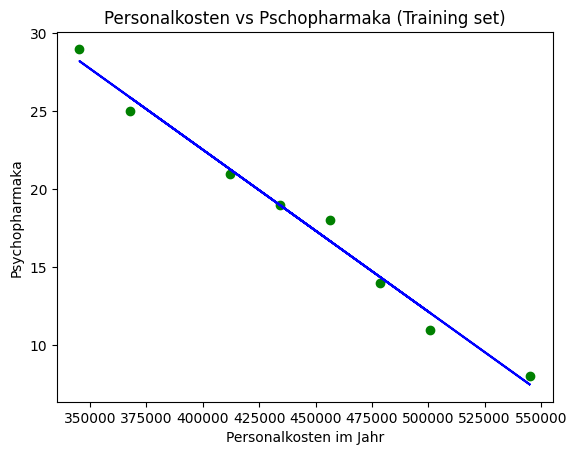

In [28]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Personalkosten vs Pschopharmaka (Training set)')
plt.xlabel('Personalkosten im Jahr')
plt.ylabel('Psychopharmaka')
plt.show()

Visualisierung der Testdaten

Das Diagramm zeigt die Beziehung zwischen den Personalkosten und der Anzahl der verordneten Psychopharmaka für die Testdaten. Hier ist eine Erklärung der verschiedenen Elemente des Diagramms:

	1.	Streudiagramm der Testdaten:
	•	Grüne Punkte: Diese Punkte repräsentieren die tatsächlichen Datenpunkte der Testdaten. Jeder Punkt stellt eine Station dar, mit den Personalkosten auf der x-Achse und der Anzahl der verordneten Psychopharmaka auf der y-Achse.
	•	Die grünen Punkte zeigen, wie die Daten verteilt sind und helfen uns zu verstehen, wie gut das Modell auf neue, unsichtbare Daten anwendbar ist.
	2.	Regressionslinie:
	•	Blaue Linie: Diese Linie repräsentiert die Vorhersagen des trainierten Modells basierend auf den Trainingsdaten. Es ist die beste Anpassungslinie, die die Beziehung zwischen den Personalkosten und der Anzahl der verordneten Psychopharmaka darstellt.
	•	Die Linie wird durch die Formel  y = b_0 + b_1 * X  berechnet, wobei  b_0  und  b_1  die während des Trainingsprozesses gelernten Parameter sind.
	•	Die Nähe der grünen Punkte zur blauen Linie zeigt, wie gut das Modell die Testdaten erfasst. Je näher die Punkte an der Linie liegen, desto besser passt das Modell zu den neuen Daten.
	3.	Titel und Achsenbeschriftungen:
	•	Titel: “Personalkosten vs Psychopharmaka (Test set)”: Der Titel des Diagramms beschreibt, was dargestellt wird, nämlich die Beziehung zwischen Personalkosten und der Anzahl der verordneten Psychopharmaka in den Testdaten.
	•	x-Achse: “Personalkosten im Jahr”: Die x-Achse repräsentiert die jährlichen Personalkosten der einzelnen Stationen.
	•	y-Achse: “Psychopharmaka”: Die y-Achse repräsentiert die Anzahl der verordneten Psychopharmaka für die Bewohner.

Durch diese Visualisierung können wir sehen, wie die unabhängige Variable (Personalkosten) und die abhängige Variable (Psychopharmaka) in den Testdaten zusammenhängen, und wie gut unser Modell diese Beziehung für neue, unsichtbare Daten erfasst. Dies hilft uns zu beurteilen, ob das Modell gut generalisiert und in der Praxis anwendbar ist.

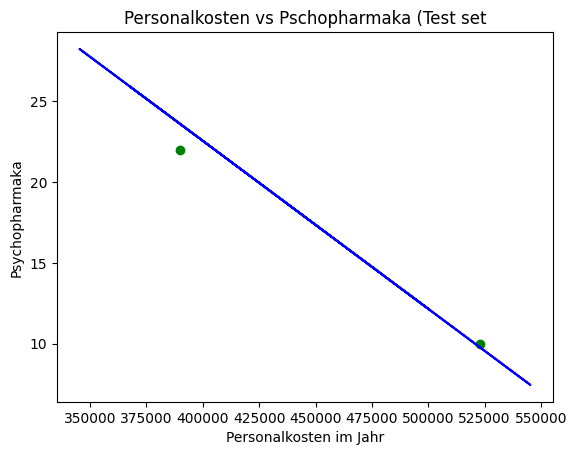

In [29]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Personalkosten vs Pschopharmaka (Test set')
plt.xlabel('Personalkosten im Jahr')
plt.ylabel('Psychopharmaka')
plt.show()

# Vorhersage für die Personalkosten von 587000 Euro

Der folgende Code macht eine Vorhersage für die Anzahl der verordneten Psychopharmaka basierend auf den Personalkosten von 587000 Euro:

In [ ]:
print(regressor.predict([[587000]]))

Erklärung des Vorgangs

	1.	Verwendung des trainierten Modells:
	•	Das trainierte regressor-Modell, das bereits mit den Trainingsdaten fit gemacht wurde, wird nun verwendet, um Vorhersagen zu treffen.
	2.	Vorhersage für neue Daten:
	•	regressor.predict([[587000]]): Der predict-Befehl verwendet das trainierte Modell, um eine Vorhersage für die unabhängige Variable (Personalkosten von 587000 Euro) zu machen.
	•	Die Eingabe [[587000]] ist eine 2D-Liste, da das Modell erwartet, dass die Eingabedaten in dieser Form vorliegen.
	3.	Ausgabe:
	•	Das Ergebnis ist die vorhergesagte Anzahl der verordneten Psychopharmaka für die angegebenen Personalkosten. Diese Vorhersage basiert auf der während des Trainings gelernten Beziehung zwischen Personalkosten und der Anzahl der verordneten Psychopharmaka.

# Darstellung der gesamten Funktion der linearen Regression

Nachdem das Modell trainiert wurde, können wir die Parameter der linearen Regressionsfunktion anzeigen, nämlich die Steigung (b_1) und den Achsenabschnitt (b_0). Diese Parameter helfen uns, die Vorhersagefunktion vollständig zu verstehen.

Hier ist der Code, um diese Parameter anzuzeigen:

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

Erklärung des Vorgangs

	1.	Steigung (b1):
	•	regressor.coef_: Dies gibt die Steigung der Regressionslinie zurück. Die Steigung zeigt, wie stark sich die abhängige Variable (Psychopharmaka) ändert, wenn sich die unabhängige Variable (Personalkosten) um eine Einheit ändert.
	•	Beispiel: Wenn die Steigung -0.0001 ist, bedeutet das, dass mit jedem zusätzlichen Euro für Personalkosten die Anzahl der verordneten Psychopharmaka um 0.0001 Einheiten sinkt.
	2.	Achsenabschnitt (b0):
	•	regressor.intercept_: Dies gibt den Achsenabschnitt der Regressionslinie zurück. Der Achsenabschnitt ist der Wert der abhängigen Variable (Psychopharmaka), wenn die unabhängige Variable (Personalkosten) null ist.
	•	Beispiel: Wenn der Achsenabschnitt 30 ist, bedeutet das, dass bei Personalkosten von 0 Euro die Anzahl der verordneten Psychopharmaka 30 Einheiten beträgt.

Durch die Kombination dieser beiden Werte können wir die lineare Regressionsfunktion vollständig ausdrücken:

 Psychopharmaka = b_0 + b_1 * Personalkosten 